# import requried libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import OneHotEncoder


# Read the datasets

In [73]:
ds= pd.read_csv('fuel consumption (1).csv')

In [3]:
ds.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
ds.tail()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN
387,"14,7",5,25,25,30,AC,SP98,1,0,0,NaN,NaN


In [81]:
ds.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [8]:
ds.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

# Checking null values

In [83]:
ds.duplicated().sum()

0

In [49]:
ds.isnull()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,True,True
2,False,False,False,False,False,True,False,False,False,False,True,True
3,False,False,False,False,False,True,False,False,False,False,True,True
4,False,False,False,False,False,True,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
383,False,False,False,False,False,True,False,False,False,False,True,True
384,False,False,False,False,False,False,False,False,False,False,True,True
385,False,False,False,False,False,True,False,False,False,False,True,True
386,False,False,False,False,False,False,False,False,False,False,True,True


In [50]:
ds.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [86]:
ds.isnull().sum().sum()

1057

# Removing null values

In [4]:
ds.dropna()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
139,"16,1","5,4",24,"21,5",7,rain,E10,0,1,0,38,E10
191,"43,7","4,7",44,22,9,half rain half sun,SP98,0,1,0,10,SP98
274,"25,7","4,9",50,22,10,rain,SP98,0,1,0,41,SP98


In [74]:
ds['temp_inside']=ds['temp_inside'].fillna(ds['temp_inside'].mode()[0])
ds['specials']=ds['specials'].fillna(ds['specials'].mode()[0])
ds['refill liters']=ds['refill liters'].fillna(ds['refill liters'].mode()[0])
ds['refill gas']=ds['refill gas'].fillna(ds['refill gas'].mode()[0])


# Handling null places

In [75]:
ds.isnull().sum()

distance         0
consume          0
speed            0
temp_inside      0
temp_outside     0
specials         0
gas_type         0
AC               0
rain             0
sun              0
refill liters    0
refill gas       0
dtype: int64

In [76]:
ds.isnull().sum().sum()

0

In [77]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    388 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       388 non-null    object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  388 non-null    object
 11  refill gas     388 non-null    object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [54]:
ds.nunique()

distance         174
consume           43
speed             60
temp_inside       13
temp_outside      33
specials          12
gas_type           2
AC                 2
rain               2
sun                2
refill liters     10
refill gas         2
dtype: int64

In [7]:
ds['distance'] = ds['distance'].str.replace(',', '').astype(int)
ds['consume'] = ds['consume'].str.replace(',', '').astype(int)
ds['temp_inside'] = ds['temp_inside'].str.replace(',', '').astype(int)
ds['refill liters'] = ds['refill liters'].str.replace(',', '').astype(int)

In [56]:
ds['specials'].unique()

array(['rain', 'AC rain', 'AC', 'snow', 'AC snow', 'half rain half sun',
       'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun', 'ac rain'], dtype=object)

In [57]:
ds['gas_type'].unique()

array(['E10', 'SP98'], dtype=object)

In [58]:
ds['refill gas'].unique()

array(['E10', 'SP98'], dtype=object)

In [78]:
ds['specials']=ds['specials'].replace(['rain', 'AC rain', 'AC', 'snow', 'AC snow', 'half rain half sun',
       'sun', 'AC sun', 'sun ac', 'ac', 'AC Sun', 'ac rain'],[0,1,2,3,4,5,6,7,8,9,10,11])
ds['gas_type']=ds['gas_type'].replace(['E10', 'SP98'],[0,1])
ds['gas_type']=ds['gas_type'].replace(['E10', 'SP98'],[0,1])
ds['refill gas']=ds['refill gas'].replace(['E10', 'SP98'],[0,1])

In [79]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    388 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       388 non-null    int64 
 6   gas_type       388 non-null    int64 
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  388 non-null    object
 11  refill gas     388 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 36.5+ KB


# visualization 

In [9]:
ds.describe()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,172.891753,43.649485,41.927835,133.175258,11.358247,0.837629,0.587629,0.077320,0.123711,0.082474,369.984536,0.987113
std,211.910501,17.779320,13.598524,98.021910,6.991542,2.222024,0.492897,0.267443,0.329677,0.275441,48.438349,0.112931
min,2.000000,4.000000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000
25%,86.000000,41.000000,32.750000,22.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,377.000000,1.000000
50%,124.000000,46.000000,40.500000,215.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,377.000000,1.000000
75%,184.000000,52.000000,50.000000,215.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,377.000000,1.000000
max,2161.000000,122.000000,90.000000,255.000000,31.000000,11.000000,1.000000,1.000000,1.000000,1.000000,383.000000,1.000000


In [62]:
ds.corr()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
distance,1.000000,-0.002587,0.544747,-0.101877,0.049115,0.129285,-0.080558,-0.021463,-0.003839,0.098344,-0.116857,0.005016
consume,-0.002587,1.000000,-0.103658,0.081657,-0.227296,-0.116168,-0.015062,-0.035586,0.137025,-0.092224,0.008668,0.037640
speed,0.544747,-0.103658,1.000000,-0.045839,0.015411,0.047073,-0.097360,-0.035408,0.009489,0.081618,0.008715,0.073428
temp_inside,-0.101877,0.081657,-0.045839,1.000000,-0.385733,-0.128945,-0.340038,-0.064686,0.027793,-0.060066,0.057217,-0.052784
temp_outside,0.049115,-0.227296,0.015411,-0.385733,1.000000,0.380156,0.148705,0.167562,-0.186315,0.346903,0.053518,0.009135
specials,0.129285,-0.116168,0.047073,-0.128945,0.380156,1.000000,0.068469,0.499483,-0.007782,0.743888,0.010684,0.043127
gas_type,-0.080558,-0.015062,-0.097360,-0.340038,0.148705,0.068469,1.000000,0.105285,0.060328,0.022761,-0.012931,0.136393
AC,-0.021463,-0.035586,-0.035408,-0.064686,0.167562,0.499483,0.105285,1.000000,0.242915,0.088598,0.041980,0.033075
rain,-0.003839,0.137025,0.009489,0.027793,-0.186315,-0.007782,0.060328,0.242915,1.000000,-0.112650,-0.114119,-0.026474
sun,0.098344,-0.092224,0.081618,-0.060066,0.346903,0.743888,0.022761,0.088598,-0.112650,1.000000,0.043479,0.034256


<AxesSubplot:>

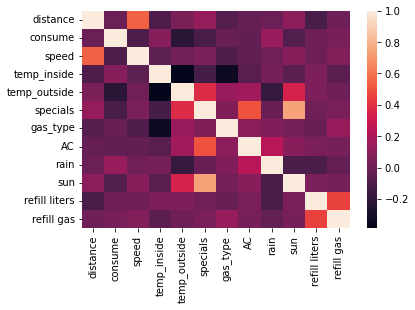

In [63]:
sns.heatmap(ds.corr())

C:\Users\Jagadeesan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='rain'>

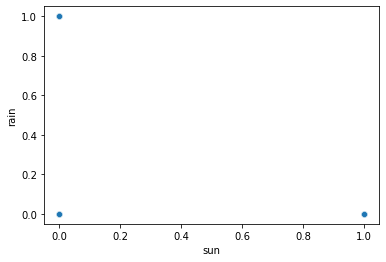

In [64]:
sns.scatterplot(ds['sun'],ds['rain'])

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   distance       388 non-null    int32
 1   consume        388 non-null    int32
 2   speed          388 non-null    int64
 3   temp_inside    388 non-null    int32
 4   temp_outside   388 non-null    int64
 5   specials       388 non-null    int64
 6   gas_type       388 non-null    int64
 7   AC             388 non-null    int64
 8   rain           388 non-null    int64
 9   sun            388 non-null    int64
 10  refill liters  388 non-null    int32
 11  refill gas     388 non-null    int64
dtypes: int32(4), int64(8)
memory usage: 30.4 KB


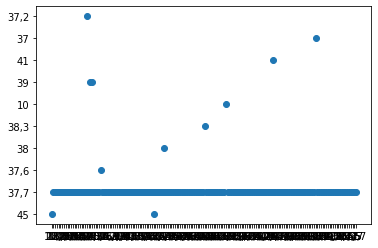

In [104]:
plt.scatter(ds['distance'],ds['refill liters'])